<a href="https://colab.research.google.com/github/waleedrizwan/portfolio_optimization/blob/master/port_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

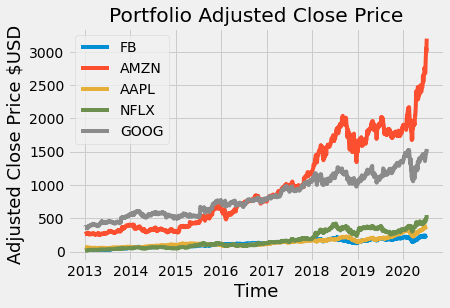

Expected Annual Return of portfolio 36.0%
Annual Volatility 24.0%
Annualized portfolio Variance 6.0%
OrderedDict([('FB', 0.1209), ('AMZN', 0.32815), ('AAPL', 0.22299), ('NFLX', 0.32796), ('GOOG', 0.0)])
Expected annual return: 42.4%
Annual volatility: 26.9%
Sharpe Ratio: 1.50
Discrete Allocation {'FB': 7.0, 'AMZN': 2.0, 'AAPL': 5.0, 'NFLX': 9.0}
Funds Remaining: $27.54


In [ ]:

# optimize user portfolio using efficient frontier theory

# maximize return, minimize risk 

from pandas_datareader import data as web
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Read stock data in a given portfolio -> uses FAANG for demonstration
assets = ['FB', 'AMZN','AAPL','NFLX','GOOG']

# assign weight of each stock as % of total portfolio
weights = np.array([0.2,0.2,0.2,0.2,0.2])

# starting date of equity data
startDate = '2013-01-01'

# last day of data obtained which is automatically set to the date
# the script is run 
endDate = datetime.today().strftime('%Y-%m-%d')

# df stores adjusted closed price of each stock
df = pd.DataFrame()
## obtains all asset data from Yahoo Finance 
for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start = startDate,end = endDate)['Adj Close']

# visualize portfolio
title = 'Portfolio Adjusted Close Price'
portfolio = df
for c in portfolio.columns.values:
  plt.plot(portfolio[c],label = c)

plt.title(title)
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Adjusted Close Price $USD',fontsize = 18)
plt.legend(portfolio.columns.values, loc = 'upper left')
plt.show()

# visualize daily simple return % 
# simple return is (price today / price yesterday) - 1
returns = df.pct_change()

# annualaized covariance matrix
# displays covariance between equities 
cov_matrix_annual = returns.cov() * 252

# calc portfolio variance 
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual, weights))

# calc portfolio volatility(std dev)
port_volatility = np.sqrt(port_variance)
port_volatility

# annual portfolio return times weight of each stock
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252

# expected annual return, volatility, and variance
percent_var = str( round( port_variance, 2 ) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'


print('Expected Annual Return of portfolio', percent_ret)
print('Annual Volatility', percent_vols)
print('Annualized portfolio Variance', percent_var)

# install packs
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# calc expected returns and annualized sample covariance matrix 
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimizes portfolio based on max Sharpe Ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

# discrete allocaton of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights

## enter total value of portfolio in USD 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation', allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))




